The script file is a python script to download images form google using maps static API and create dataset folder. After running this code, a dataset folder will be created. It will contain the following folders hierarchy: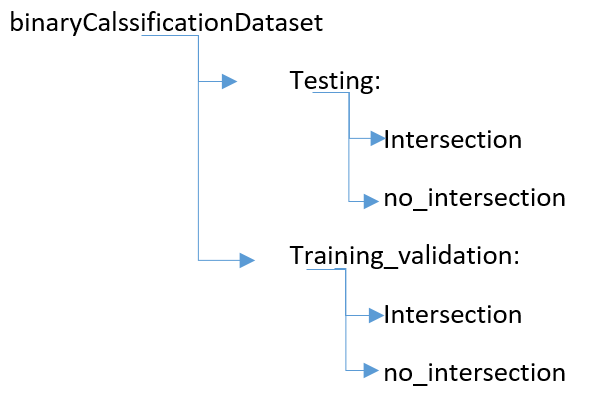

To run this script, you need to enter the following parameters: api_key, maptype, annottation_folder_path, and destination_path.
1.	api_key: To download images form Google map, you need to create a project with a billing account. Then, you must enable the maps static API. Then, use this API key in our script. For more details about how to create this API, follow instructions in this link. https://developers.google.com/maps/documentation/maps-static/get-api-key.
2.	maptype: you have to identify which type of image do you want to include in dataset. We used two type satellite or hybrid. Before you run the script, be sure that you use the one you want.
3.	annottation_folder_path: In this field, put the path for the annotation folder that associated with this scrip.
4.	destination_path: In this filed, define a path to a create dataset folder in it.


In [1]:
# Import important library
import csv
import requests
import os
import shutil

Change the following parameters according to your needs

In [4]:
# Enter your api key here
api_key = ""
# Enter type of map 
# we used 'satellite' or 'hybrid'
maptype='satellite'
# Annotation Folder: this folder contains annotation files. It has four files. 
# Two of them are annotation for testing images: one for intersection and another one for no intersection class.
# Other two of them are annotation for training and validation images: one for intersection and another one for no intersection class
#Put the path for annotation folder
annottation_folder_path='/content/drive/MyDrive/Using_Satellite_Images_Datasets_for_Road_Intersection_Detection_in_Route_Planning/Images_center_for_Binary_Calssification'
#'/content/drive/MyDrive/Road_intersection_location_using_satellite_images_datasets_for_route_planning/Images_center_for_Binary_Calssification'
#Destination path
destination_path='/content/drive/MyDrive/Using_Satellite_Images_Datasets_for_Road_Intersection_Detection_in_Route_Planning/'
# Name of dataset folder, here where the dataset will be created
destination_images_folder=destination_path+'binaryCalssificationDataset'+'_'+maptype

In [5]:
# If dataset folder is not exist, create it 
if api_key:
  try:
    
    shutil.copytree(annottation_folder_path, destination_images_folder, ignore = shutil.ignore_patterns('*.csv', 'a'))
    print('Start creating dataset')
    Flag=True
    '''
    Loop over the each annotation file that contains the center of images. Then, request images form google and save them in destination folder
    '''
    for subdir, dirs, files in os.walk(annottation_folder_path):
          print(1)
          currentFolder=subdir
          print(currentFolder)
          for file in files:
            print(file)
            ImageFolder=os.path.join(destination_images_folder,*(currentFolder.split(os.path.sep)[-2:]))
            print(ImageFolder)
            with open(os.path.join(currentFolder,file), newline='') as csvfile:
              reader = csv.DictReader(csvfile)
              for row in reader:
                        image_name=row['Image_name']
                        new_image_file=ImageFolder+'/'+image_name
                        centerOfImage=row['Center_point']
                        prameters=centerOfImage+'&zoom=19&size=256x256&scale=1&maptype='+str(maptype)

                        try:
                          
                          r=requests.get('https://maps.googleapis.com/maps/api/staticmap?center='+prameters+'&key='+ api_key)
                        except:
                          print('Check your input pramters')
                          Flag=False
                        try:
                          with open(new_image_file, 'wb') as file:
                                    # writing data into the file
                                    file.write(r.content)
                                    # close method of file object
                                    # save and close the file
                                    file.close()
                        except:
                          print('Can not save this image '+new_image_file)
                          Flag=False
    if Flag==True:
      print('Dataset is created')
      
  except Exception as e: 
    print(e)
else:
  print('you have to set api_key')    

you have to set api_key
